# MNIST digit recognizer Kaggle competition

In this notebook we will conduct analysis and modelling of MNIST dataset prepare for Kaggle [competition](https://www.kaggle.com/c/digit-recognizer).

MNIST ("Modified National Institute of Standards and Technology") is one of the most pupular datasets in machine learning world and handwritten images of digits. It served as the basis for benchmarking classification algorithms. To read more about MNIST dataset visit Yann LeCun's [website](http://yann.lecun.com/exdb/mnist/index.html).

## Frame the problem and look at the big picture

In this competition our goal is to correctly identify digits from a MNIST dataset containing tens of thousands of handwritten images.We take an image of a handwritten single digit, and determine what that digit is. For every ImageId in the test set, we should predict the correct label.

The problem is clearly supervised learning problem: the data we have contains image representation along with it's true value label. This is also a classification task since we deal with discrete and finite number of categories that we want to assign to each of the input data. 

When it comes to performance measures for classification task like this one there are several options we could take. Kaggle competition defines the evaluation metric for this contest to be the categorization accuracy, or the proportion of test images that are correctly classified. We will follow this measure. Example categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

Our submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if we predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then our submission file would look like this:
```
ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
```

## Get the data

We are now ready to start working with our real dataset.

We downloaded the data from competition website. 

The data files train.csv and test.csv contain gray-scale images representations of hand-drawn digits: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

Each image is 28 pixels in height and 28 pixels in width, making 784 pixels in total for every image. Each pixel has a single pixel value associated with it, indicating the lightness or darkness of that pixel. Higher numbers meaning darker and lower meaning brighter. This pixel-value is an integer between 0 and 255 inclusive.

The training data set (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the 784 pixel-values of the associated image. There are 42000 images in training dataset.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783 inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix indexing by zero.

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top. If we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.





We know a lot about our data. Let's load it and look at it.

In [7]:
import pandas as pd

mnist_train = pd.read_csv("datasets/train.csv")

In [8]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that, as described above, each row contains `label` column and pixel values ranging from `pixel0` to `pixel783`.

In [4]:
mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


We can seet that the training dataset indeed contains 42000 digits represented by 784 pixel values each (28x28 px) and with target value label for each of them.

Let's now see how one digit image representation data looks like. We choose digit with index 5544 at random.

In [87]:
some_digit_index = 5241
some_digit_label = mnist_train.iloc[some_digit_index].loc["label"]
some_digit_data = mnist_train.iloc[some_digit_index].drop("label")

In [88]:
some_digit_label

2

In [89]:
some_digit_data

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 5241, dtype: int64

We can see selected example digit label and all its pixel values. To see what image this data represents let's visualize it.

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_digit(mnist_digit_data):
    digit_img = some_digit_data.values.reshape(28, 28)
    plt.imshow(digit_img, interpolation='nearest', cmap=plt.cm.binary)
    plt.axis("off")
    plt.show()

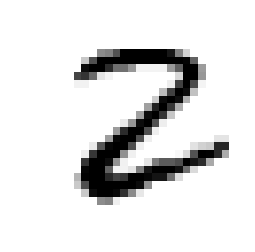

In [91]:
plot_digit(some_digit_data)

We can now clearly see that the data row printed above represents handwritten two digit.

So the data we have looks corret and along with provided documentation. Since Kaggle provided us with test dataset we do not create just use the one from Kaggle. And also considering the nature of the data feature being greyscale pixel values, as we showed above printing the data and plotting it, there is no need for further data exploration phase. Let's them prepare our data for modelling phase now.

## Prepare the data

We will prepare the data to feed into machine learning algorithms by separating the labels data and the pixels values data in our training dataset.

In [92]:
mnist_train_data = mnist_train.drop("label", axis=1).copy()
mnist_train_labels = mnist_train["label"].copy()

In [93]:
mnist_train_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
mnist_train_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Our training data and labels looks all right now. Let's then go straight into creating machine learning models for our data.

## Short-list promising models

We will start by training several quick and dirty models to see how they behave. 

A good place to start will be a Stochastic Gradient Descent classifier, using Scikit-Learn's `SGDClassifier`. Let's create an instance of it and train it using prepared MNIST traing values and labels sets.

In [95]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(mnist_train_data, mnist_train_labels)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

Let's test our model on the sample digit `2` representation we used earlier.

In [96]:
sgd_clf.predict([some_digit_data])

array([2])

As we can see it was correctly classified as digit 2.

Let's now train another model, namely Random Forest classifier using Scikit-Learn's `RandomForestClassifier`.

In [100]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(mnist_train_data, mnist_train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

And again lets try to use our trained model to predict on our example data.

In [102]:
forest_clf.predict([some_digit_data])

array([2])

Again the model predicted correctly.